In [2]:
import xarray as xr
import pandas as pd
import numpy as np
import scipy
from scipy import stats 
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import *
import matplotlib.colors as colors
import openpyxl
from netCDF4 import Dataset
import h5netcdf

In [3]:
sourceData='/bettik/amoryc/MARout/GRa/spin2/work/'
variable='TT' ##RF;SF;SHSN3;TT
fileNameM='mon-TT-MARv3.14_ER5-2000-2023.nc' ##change to monthly
dsM= xr.open_dataset(sourceData+fileNameM)['TT']

In [4]:
## Model MAR
sourceDataGrid='/home/amoryc/'
#fileName_grF='NST.2000.01.01.00.GRa_Fedchenko.nc'
fileName_grM='NST.2000.01.01.00.GRa_Mera.nc_ICEmask'
ds_grM= xr.open_dataset(sourceDataGrid+fileName_grM)

In [5]:
#Gra Mera 5km
sourceData='/bettik/amoryc/MARout/GRa/spin2/work/'
variable='TT' ##RF;SF;SHSN3;TT
fileNameM='mon-TT-MARv3.14_ER5-2000-2023.nc' ##change to monthly
dsM= xr.open_dataset(sourceData+fileNameM)['TT'][:,1,:,:] ## montlhy mean

In [6]:
###
#AWS-Mera La: Since November 2013 (AWS inserted on firm rocks – off-glacier)
#Location in WGS84, Lat: 27.735°N; Long: 86.900°E; Elevation: 5352.008 m 
#or UTM Zone 45; Easting: 490137.007 m; Northing: 3067850.613 m on 22/11/2020
###
lon_MeraLa=86.900
lat_MeraLa=27.735
elev_MeraLa=5352.008
##Find the pixel of MAR corresponding to station
target_lon = lon_MeraLa
target_lat = lat_MeraLa
lon=ds_grM.LON
lat=ds_grM.LAT

In [21]:
#Step 2: Find the nearest grid point to target_lon,target_lat
# Compute distance to each grid point
dist = np.sqrt((lon - target_lon)**2 + (lat - target_lat)**2)
j, i = np.unravel_index(dist.argmin(), dist.shape)

In [8]:
print(j,i)

40 99


In [40]:
#Step 3: Extract data at that location
# For a single time step
#value = dsM['SH'].isel(y=j, x=i)
## If there's a time dimension
dsM_sta1=dsM[0:, i, j]
dsM_sta2=dsM[0:, i, j+1]
dsM_sta3=dsM[0:, i-1, j+1]
dsM_sta4=dsM[0:, i-1, j]
dsM_sta5=dsM[0:, i-1, j-1]
dsM_sta6=dsM[0:, i, j-1]
dsM_sta7=dsM[0:, i+1, j-1]
dsM_sta8=dsM[0:, i+1, j]
dsM_sta9=dsM[0:, i+1, j+1]

#dsM_sta_newlist=[dsM_sta_new1,dsM_sta_new2,dsM_sta_new3,dsM_sta_new4,dsM_sta_new5,dsM_sta_new6,dsM_sta_new7,dsM_sta_new8,dsM_sta_new9]


dsM_sta_newx1= dsM_sta1.rename({'TIME': 'time'})
dsM_sta_newx2= dsM_sta2.rename({'TIME': 'time'})
dsM_sta_newx3= dsM_sta3.rename({'TIME': 'time'})
dsM_sta_newx4= dsM_sta4.rename({'TIME': 'time'})
dsM_sta_newx5= dsM_sta5.rename({'TIME': 'time'})
dsM_sta_newx6= dsM_sta6.rename({'TIME': 'time'})
dsM_sta_newx7= dsM_sta7.rename({'TIME': 'time'})
dsM_sta_newx8= dsM_sta8.rename({'TIME': 'time'})
dsM_sta_newx9= dsM_sta9.rename({'TIME': 'time'})


#units=dsM.units
dsM_sta_new1= dsM_sta_newx1.where(dsM_sta_new2.values <= 70)
dsM_sta_new2= dsM_sta_newx2.where(dsM_sta_new2.values <= 70)
dsM_sta_new3= dsM_sta_newx3.where(dsM_sta_new2.values <= 70)
dsM_sta_new4= dsM_sta_newx4.where(dsM_sta_new2.values <= 70)
dsM_sta_new5= dsM_sta_newx5.where(dsM_sta_new2.values <= 70)
dsM_sta_new6= dsM_sta_newx6.where(dsM_sta_new2.values <= 70)
dsM_sta_new7= dsM_sta_newx7.where(dsM_sta_new2.values <= 70)
dsM_sta_new8= dsM_sta_newx8.where(dsM_sta_new2.values <= 70)
dsM_sta_new9= dsM_sta_newx9.where(dsM_sta_new2.values <= 70)


np.float32(140.73828)

In [82]:
#Evaluer la différence de hauteur entre la station et le niveau 1 de la grille MAR considérée
SH_sta=elev_MeraLa
MAR1= ds_grM['SH'].isel(y=j, x=i)
MAR2= ds_grM['SH'].isel(y=j+1, x=i)
MAR3= ds_grM['SH'].isel(y=j+1, x=i-1)
MAR4= ds_grM['SH'].isel(y=j, x=i-1)
MAR5= ds_grM['SH'].isel(y=j-1, x=i-1)
MAR6= ds_grM['SH'].isel(y=j-1, x=i)
MAR7= ds_grM['SH'].isel(y=j-1, x=i+1)
MAR8= ds_grM['SH'].isel(y=j, x=i+1)
MAR9= ds_grM['SH'].isel(y=j+1, x=i+1)

diff1=SH_sta-MAR1.values
diff2=SH_sta-MAR2.values
diff3=SH_sta-MAR3.values
diff4=SH_sta-MAR4.values
diff5=SH_sta-MAR5.values
diff6=SH_sta-MAR6.values
diff7=SH_sta-MAR7.values
diff8=SH_sta-MAR8.values
diff9=SH_sta-MAR9.values

#Correction de mar en fonction de la diff d'altitude: 5.2
dsM_sta_new1_corrected=dsM_sta_new1.values - 5.2 * diff1
dsM_sta_new1_corrected=dsM_sta_new2.values - 5.2 * diff2
dsM_sta_new1_corrected=dsM_sta_new3.values - 5.2 * diff3
dsM_sta_new1_corrected=dsM_sta_new4.values - 5.2 * diff4
dsM_sta_new1_corrected=dsM_sta_new5.values - 5.2 * diff5
dsM_sta_new1_corrected=dsM_sta_new6.values - 5.2 * diff6
dsM_sta_new1_corrected=dsM_sta_new7.values - 5.2 * diff7
dsM_sta_new1_corrected=dsM_sta_new8.values - 5.2 * diff8
dsM_sta_new1_corrected=dsM_sta_new9.values - 5.2 * diff9




In [83]:
####
## Opening station data
####

sourceData='/bettik/PROJECTS/pr-regional-climate/santolam/glacioclim/donnees_meteo/'
fileName='MeraLafinal2013_24.xlsx'
xl_file = pd.ExcelFile(sourceData+fileName)
print(xl_file)

In [84]:
dfs = {sheet_name: xl_file.parse(sheet_name) 
          for sheet_name in xl_file.sheet_names}
DataMeraLa=dfs['MeraLa2013_23']

NameVars=['Time','Tair','RH','u','Direction','SWin','SWout','LWin','LWout','Patm']
UnitVars=['data/hour','C','%','m/s','degrees','W/m2','W/m2','W/m2','W/m2','hPa']

##Define new DataFrame and changing name of columns
dfile = pd.DataFrame(data=DataMeraLa.loc[4:])
df=pd.DataFrame(dfile.values, columns=NameVars)

### Opening one column + converting into an array
Tair_ar=[float(i) for i in df.Tair.values]


In [85]:
##In original time data from DataFrame, frequency is not defined so I cannot use the usual fonction (xr,pd)
##Need to redefine a time array + build a xarray of variable V=V(time)
def NewTime(
        NameVar,
        Var_ar,
        freq):
    start, end = df.Time.values[0], df.Time.values[-1]
    time = pd.date_range(start, end, freq=freq)
    ds = xr.Dataset({NameVar: ("time",np.asarray(Var_ar)), "time": time})
    return ds 

In [86]:
#Définition Variables
T=NewTime('Tair',Tair_ar,'30min')


In [87]:
daily_meanT=T.resample(time='D').mean()                          #Utilisation de la librairie xarray maintenant possible car les données ont une forme bien définie
monthly_meanT=daily_meanT.resample(time='ME').mean()             # chaque variable ici défini est un xarray.Dataset
yearly_meanT=monthly_meanT.resample(time='YE').mean()
#daily_meanTM

In [88]:
#Définition des Saisons, et création d'une fonction qui définit les saisons en fonction des périodes des moussons:
seasons = {
	'MAM': [3, 4, 5],  	
	'JJAS': [6, 7, 8, 9],  
	'ON': [10, 11],    	
	'DJF': [12, 1, 2]  	
}
def seasonsdata(ds, season_name):  #monthly_meanTM.sel(time=monthly_meanTM['time'].dt.month.isin(seasons['MAM'])). Sélectionne dans le dataset les mois correspondants aux saisons définies au dessus

	x = seasons[season_name]
	return ds.sel(time=ds['time'].dt.month.isin(x))


In [89]:
# Get the time coordinates CORRIGER DIFF ENTRE MAR ET STATION
time1 = monthly_meanT['time']# début 2013-11-15 fin 2024-11-28
time2 = dsM_sta_new1['time'] # début 2003-01-01T12: fin 2013-12-31T12
start=time1[0] 
end=time2[-1]

In [90]:
ts_sta=monthly_meanT.sel(time=slice(start,end))


ts_MAR1=dsM_sta_new1.sel(time=slice(start,end))
ts_MAR2=dsM_sta_new2.sel(time=slice(start,end))
ts_MAR3=dsM_sta_new3.sel(time=slice(start,end))
ts_MAR4=dsM_sta_new4.sel(time=slice(start,end))
ts_MAR5=dsM_sta_new5.sel(time=slice(start,end))
ts_MAR6=dsM_sta_new6.sel(time=slice(start,end))
ts_MAR7=dsM_sta_new7.sel(time=slice(start,end))
ts_MAR8=dsM_sta_new8.sel(time=slice(start,end))
ts_MAR9=dsM_sta_new9.sel(time=slice(start,end))




In [91]:
Tsta_monthly_cycle=monthly_meanT.groupby('time.month').mean()



TMAR_monthly_cycle1=ts_MAR1.groupby('time.month').mean()
TMAR_monthly_cycle2=ts_MAR2.groupby('time.month').mean()
TMAR_monthly_cycle3=ts_MAR3.groupby('time.month').mean()
TMAR_monthly_cycle4=ts_MAR4.groupby('time.month').mean()
TMAR_monthly_cycle5=ts_MAR5.groupby('time.month').mean()
TMAR_monthly_cycle6=ts_MAR6.groupby('time.month').mean()
TMAR_monthly_cycle7=ts_MAR7.groupby('time.month').mean()
TMAR_monthly_cycle8=ts_MAR8.groupby('time.month').mean()
TMAR_monthly_cycle9=ts_MAR9.groupby('time.month').mean()




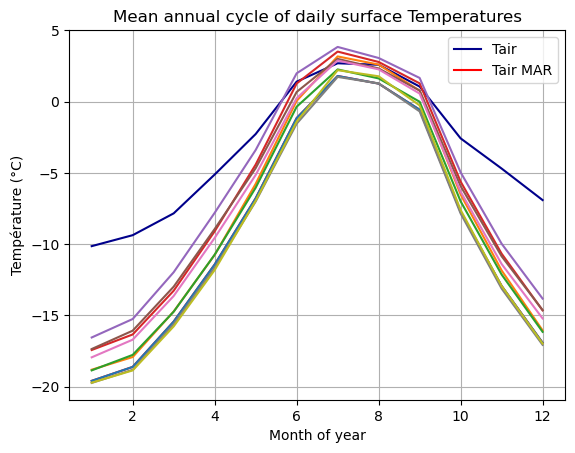

In [92]:
#Monthly cycle

plt.plot(Tsta_monthly_cycle.month,Tsta_monthly_cycle.Tair,
    color='darkblue',linestyle='-',label='Tair')

plt.plot(TMAR_monthly_cycle1.month,TMAR_monthly_cycle1.values,
    color='red',linestyle='-',label='Tair MAR')
plt.plot(TMAR_monthly_cycle1.month,TMAR_monthly_cycle1.values)
plt.plot(TMAR_monthly_cycle2.month,TMAR_monthly_cycle2.values)
plt.plot(TMAR_monthly_cycle3.month,TMAR_monthly_cycle3.values)
plt.plot(TMAR_monthly_cycle4.month,TMAR_monthly_cycle4.values)
plt.plot(TMAR_monthly_cycle5.month,TMAR_monthly_cycle5.values)
plt.plot(TMAR_monthly_cycle6.month,TMAR_monthly_cycle6.values)
plt.plot(TMAR_monthly_cycle7.month,TMAR_monthly_cycle7.values)
plt.plot(TMAR_monthly_cycle8.month,TMAR_monthly_cycle8.values)
plt.plot(TMAR_monthly_cycle9.month,TMAR_monthly_cycle9.values)

plt.legend()
plt.title('Mean annual cycle of daily surface Temperatures')
plt.xlabel('Month of year')
plt.ylabel('Température (°C)')

plt.grid(True)

Text(0, 0.5, 'Negative T Bias (°C)')

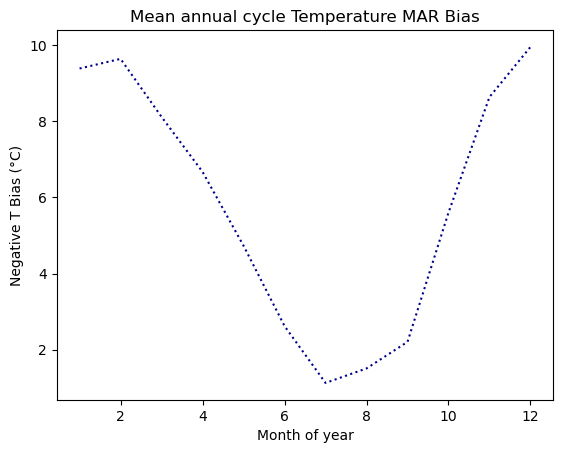

In [46]:
#MAR BIAS over Monthly mean data:
plt.plot(TMAR_monthly_cycle.month, Tsta_monthly_cycle.Tair-TMAR_monthly_cycle.values,
         color='darkblue',linestyle=':',label='Tair;'+'MAR')
plt.title('Mean annual cycle Temperature MAR Bias')
plt.xlabel('Month of year')
plt.ylabel('Negative T Bias (°C)')


In [237]:
print('différence dT/dt entre données sta et model MAR :','MAM:',linTsta_premon.slope-linTMAR_premon.slope,'JJAS:', linTsta_mon.slope-linTMAR_mon.slope,'ON:', linTsta_postmon.slope-linTMAR_postmon.slope,'DJF:', linTsta_hiver.slope-linTMAR_hiver.slope)

différence dT/dt entre données sta et model MAR : MAM: -0.07236840985313293 JJAS: -0.026487631744933834 ON: 0.12216180116158334 DJF: 0.10914165702904702
